# **Trabajo Practico 2**

Entrega:
       
*   Barbara
*   Pedro Perez

Implementar la función
create_gauss_filter (h, w, k_size , para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.

Implementación de la función create_gauss_filter:
Esta función crea un filtro gaussiano en el dominio espacial y calcula su Transformada de Fourier.

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd





## 1. Creación del Filtro Gaussiano

El filtro gaussiano se utiliza para suavizar imágenes y reducir el ruido. Se define por la función:

$$G(x, y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

- `gaussian_kernel`: Esta función crea un kernel gaussiano bidimensional. El tamaño del kernel (`k_size`) y la desviación estándar (`sigma`) son parámetros que determinan el grado de suavizado.

## 2. Aplicación del Filtro

El filtrado de una imagen se puede realizar en el dominio espacial o en el dominio de la frecuencia (espectral).

- `apply_filter`: Esta función aplica el filtro gaussiano a una imagen en el dominio de la frecuencia. Primero, se calculan las transformadas de Fourier de la imagen y del kernel. Luego, se realiza el producto punto a punto de estas transformadas, y finalmente, se aplica la transformada inversa de Fourier para obtener la imagen filtrada en el dominio espacial.

## 3. Visualización de Resultados

- `plot_filter_and_fft`: Esta función muestra el kernel gaussiano y su transformada de Fourier. La transformada de Fourier del kernel revela cómo afecta el filtro a las diferentes frecuencias de la imagen.

- `plot_image`: Esta función muestra la imagen original en escala de grises, la imagen filtrada en el espectro (dominio de la frecuencia) y la imagen filtrada en el espacio (dominio espacial). La imagen filtrada en el espectro muestra cómo se han atenuado ciertas frecuencias, mientras que la imagen filtrada en el espacio muestra el resultado final del suavizado.

## 4. Filtrado en el Espacio vs. Espectro

- **Filtrado en el Espacio**: Consiste en la convolución del kernel con la imagen. Cada píxel de la imagen resultante es una combinación ponderada de los píxeles vecinos en la imagen original.

- **Filtrado en el Espectro**: Se realiza multiplicando la transformada de Fourier de la imagen por la transformada de Fourier del filtro. En el dominio de la frecuencia, la convolución se convierte en una multiplicación simple, lo que a menudo resulta en una mayor eficiencia computacional.

La elección entre filtrar en el espacio o en el espectro depende de factores como el tamaño del kernel y las características de la imagen.


In [4]:
def create_gauss_filter(h, w, k_size, sigma):
    x, y = np.meshgrid(np.arange(k_size) - k_size // 2, np.arange(k_size) - k_size // 2)
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    
    padded_kernel = np.zeros((h, w))
    padded_kernel[:k_size, :k_size] = kernel
    
    kernel_fft = np.fft.fft2(padded_kernel)
    
    return padded_kernel, kernel_fft


In [5]:

def apply_filter(image, kernel, in_spectrum=False):
    image_fft = np.fft.fft2(image)
    if in_spectrum:
        kernel_fft = kernel
    else:
        kernel_fft = np.fft.fft2(kernel, s=image.shape)
    filtered_image = np.fft.ifft2(image_fft * kernel_fft)
    filtered_image = np.real(filtered_image)
    filtered_image = filtered_image.astype(np.uint8)
    return filtered_image


In [6]:
def plot_filter_and_fft(kernel, kernel_fft, k_size, sigma, ax):
    ax[0].imshow(kernel, cmap='gray')
    ax[0].set_title(f'Kernel\nTamaño: {k_size}, Sigma: {sigma}', fontsize=32)  # Increased font size
    ax[0].axis('off')
    
    ax[1].imshow(np.abs(np.fft.fftshift(kernel_fft)), cmap='gray')
    ax[1].set_title(f'FFT del Kernel\nTamaño: {k_size}, Sigma: {sigma}', fontsize=32)  # Increased font size
    ax[1].axis('off')


In [7]:

def plot_image(filtered_image_spec, filtered_image_space, ax):
    ax[0].imshow(filtered_image_spec, cmap='gray')
    ax[0].set_title('Imagen Filtrada\nEspectro', fontsize=32)  # Increased font size
    ax[0].axis('off')
    
    ax[1].imshow(filtered_image_space, cmap='gray')
    ax[1].set_title('Imagen Filtrada\nEspacio', fontsize=32)  # Increased font size
    ax[1].axis('off')

A-filtro gaussiano en el dominio espacial: graficar tanto el filtro gaussiano en el dominio espacial
B-Su transformada de Fourier: su versión transformada en el dominio de la frecuencia (usando la transformada de Fourier).

ValueError: num must be an integer with 1 <= num <= 9, not 10

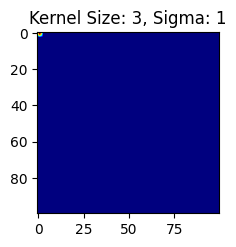

In [9]:

# Parámetros
h, w = 100, 100  # Tamaño de la imagen
k_sizes = [3, 5, 9]  # Tamaños de kernel
sigmas = [1, 2, 4]  # Sigma para el filtro gaussiano

# Crear y graficar los filtros gaussianos y sus transformadas
plt.figure(figsize=(12, 8))
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        gaussian, gaussian_fft = create_gauss_filter(h, w, k_size, sigma)

        # Visualización del kernel en el dominio espacial
        plt.subplot(len(k_sizes), len(sigmas), i * len(sigmas) + j + 1)
        plt.imshow(np.log(np.abs(gaussian) + 1), cmap='jet')
        plt.title(f'Kernel Size: {k_size}, Sigma: {sigma}')

        # Visualización del kernel en el dominio de la frecuencia
        plt.subplot(len(k_sizes), len(sigmas), i * len(sigmas) + j + 1 + len(k_sizes) * len(sigmas))
        plt.imshow(np.log(np.abs(gaussian_fft) + 1), cmap='jet')
        plt.title(f'FFT of Gaussian Filter')

plt.tight_layout()
plt.show()

# Aplicar el filtro a una imagen
image = cv.imread('fruta.png', cv.IMREAD_GRAYSCALE)
filtered_images = []
for k_size in k_sizes:
    for sigma in sigmas:
        gaussian, _ = create_gauss_filter(h, w, k_size, sigma)
        filtered_image = cv.filter2D(image, -1, gaussian)
        filtered_images.append(filtered_image)

# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(12, 8))
plt.subplot(len(k_sizes), len(sigmas) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        idx = i * len(sigmas) + j + 2
        if idx <= 9:
            plt.subplot(len(k_sizes), len(sigmas) + 1, i * (len(sigmas) + 1) + j + 2)
            plt.imshow(filtered_images[i * len(sigmas) + j], cmap='gray')
            plt.title(f'KSize: {k_size}, Sigma: {sigma}')
        else:
            break
plt.tight_layout()
plt.show()


C:\Users\barba\AppData\Local\Temp\ipykernel_13628\4255898048.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


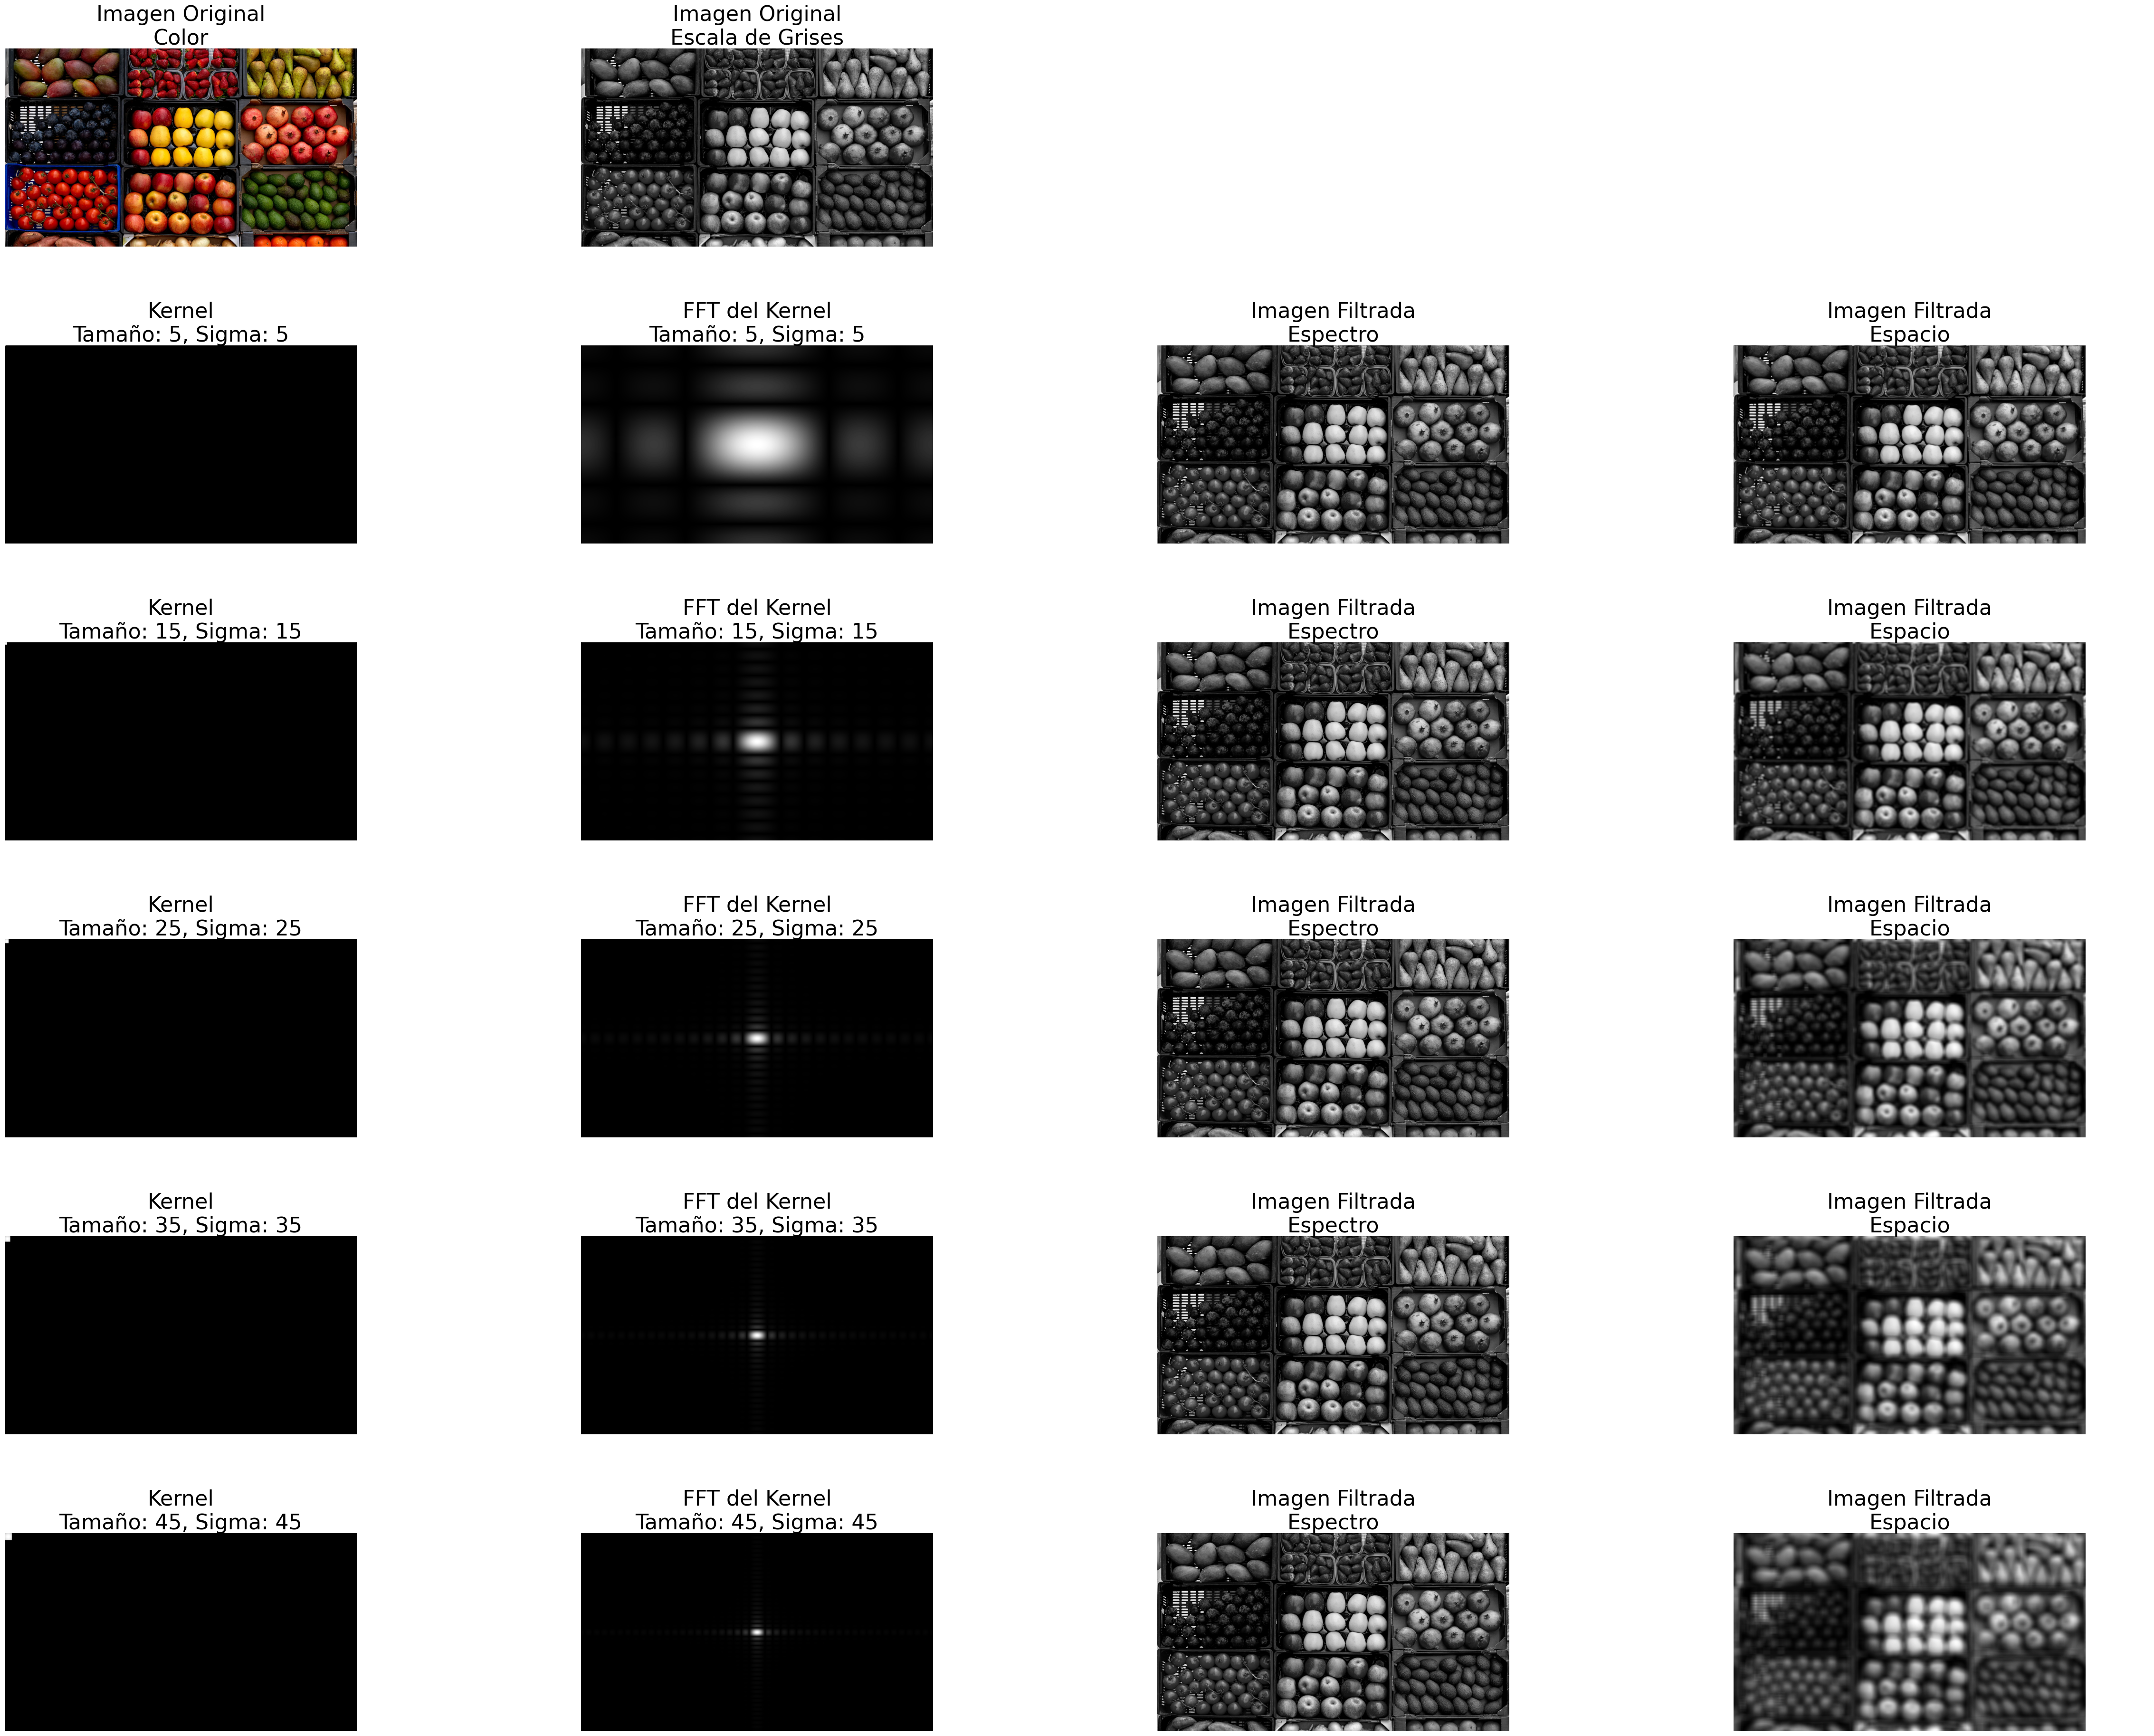

In [21]:


# Cargar imagen
path = 'FRUTA.png'
image_color = cv.imread(path)
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY)

# Definir tamaños de kernel y sigmas
k_sizes = [5, 15, 25, 35, 45]
sigmas = [5, 15, 25, 35, 45]

# Crear figura para mostrar imagen original y filtros
fig, axes = plt.subplots(len(k_sizes) + 1, 4, figsize=(60, 46), gridspec_kw={'hspace': 0.5})  # Adjusted figsize and added hspace

# Mostrar imagen original en color y en escala de grises
axes[0, 0].imshow(cv.cvtColor(image_color, cv.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Original\nColor', fontsize=32)  # Increased font size
axes[0, 0].axis('off')

axes[0, 1].imshow(image_gray, cmap='gray')
axes[0, 1].set_title('Imagen Original\nEscala de Grises', fontsize=32)  # Increased font size
axes[0, 1].axis('off')

# Dejar los dos últimos subplots de la primera fila vacíos para mantener la estructura
axes[0, 2].axis('off')
axes[0, 3].axis('off')

# Graficar filtros, sus transformadas de Fourier y aplicar a la imagen
for i, (k_size, sigma) in enumerate(zip(k_sizes, sigmas)):
    kernel, kernel_fft = create_gauss_filter(image_gray.shape[0], image_gray.shape[1], k_size, sigma)
        
    filtered_image = apply_filter(image_gray, kernel, in_spectrum=False)

    
    plot_filter_and_fft(kernel, kernel_fft, k_size, sigma, axes[i + 1, :2])
    plot_image(image_gray, filtered_image, axes[i + 1, 2:])

plt.tight_layout()
plt.show()


# Comparación de Filtrado por Convolución y Filtrado Espectral
## Usando el Método del Paper "Image Sharpness Measure for Blurred Images in Frequency Domain"


1. **Funciones FM y ACM:** Calcular la nitidez de Fourier (FM) y el contraste de amplitud modulada (ACM) de una imagen.

2. **Cargar Imagen Original:** Cargar una imagen en escala de grises.

3. **Definir Parámetros del Filtro Gaussiano:** Tamaño del kernel (`k_size`) y desviación estándar (`sigma`).

4. **Creación de Filtros Gaussianos:** Para el espectro de frecuencia y el dominio espacial.

5. **Aplicación de Filtros Gaussianos:** A la imagen original en ambos dominios.

6. **Cálculo de FM y ACM para Imágenes Filtradas:** En el espectro de frecuencia y en el dominio espacial.

7. **Visualización de Resultados:** Mostrar imágenes original, filtrada en el espectro y en el espacio, con sus valores de FM y ACM.


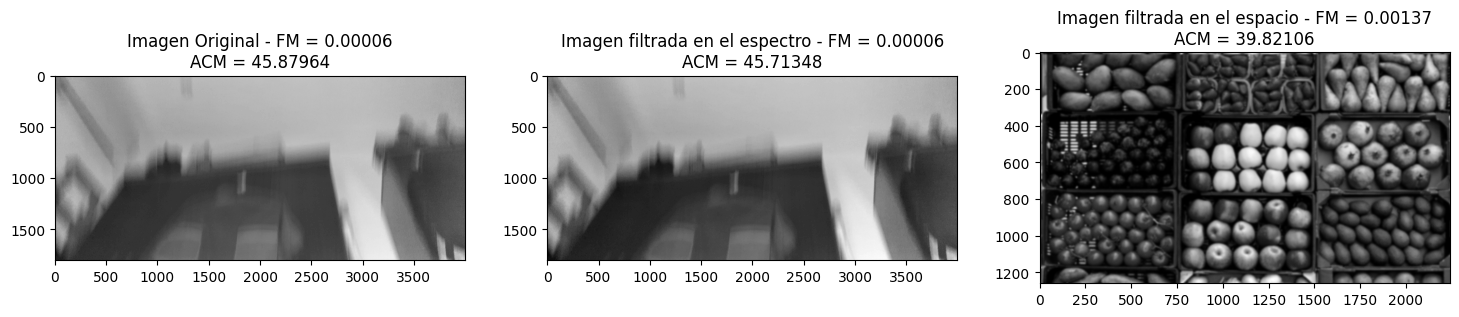

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def FM_calc(image):
    F = np.fft.fft2(image)
    Fc = np.fft.fftshift(F)
    AF = np.abs(Fc)
    Max_AF = np.max(AF)
    Th = len(F[F > Max_AF/1000])
    FM = Th / (image.shape[0] * image.shape[1])
    return FM

def ACM_calc(image):
    ACM = 0
    histogram = cv.calcHist([image], [0], None, [256], [0, 256])
    mean = np.mean(image)
    for i in range(len(histogram)):
        ACM += histogram[i] * np.abs(i - mean)
    ACM = ACM / (image.shape[0] * image.shape[1])
    return ACM[0]

# Cargar imagen
path = "borrosa.jpg"
image = cv.imread(path, cv.IMREAD_GRAYSCALE)

# Definir tamaño de kernel y sigma
k_size = 9
sigma = 1.5  # Ajustar sigma para un suavizado menos pronunciado

# Crear filtro gaussiano para el espectro
kernel_spec, kernel_fft_spec = create_gauss_filter(image.shape[0], image.shape[1], k_size, sigma)
image_filtered_spec = apply_filter(image, kernel_fft_spec, in_spectrum=True)

# Crear filtro gaussiano para el espacio
k_size_space = 25
sigma_space = 4.0
kernel_space, kernel_fft_space = create_gauss_filter(image_gray.shape[0], image_gray.shape[1], k_size_space, sigma_space)
image_filtered_space = apply_filter(image_gray, kernel_fft_space, in_spectrum=True)

# Graficar
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 12))
ax1.imshow(image, cmap='gray')
ax1.set_title(f'Imagen Original - FM = {FM_calc(image):.5f}\nACM = {ACM_calc(image):.5f}')

ax2.imshow(image_filtered_spec, cmap='gray')
ax2.set_title(f'Imagen filtrada en el espectro - FM = {FM_calc(image_filtered_spec):.5f}\nACM = {ACM_calc(image_filtered_spec):.5f}')

ax3.imshow(image_filtered_space, cmap='gray')
ax3.set_title(f'yyyyImagen filtrada en el espacio - FM = {FM_calc(image_filtered_space):.5f}\nACM = {ACM_calc(image_filtered_space):.5f}')

plt.show()


## Análisis de Medidas de Calidad de Imagen

Los resultados muestran los valores de dos medidas de calidad de imagen, FM (*Frequency Measure*) y ACM (*Amplitude Contrast Measure*), para la imagen original y para las imágenes filtradas en el espectro y en el espacio.

### Imagen Original:
- **FM = 0.00248**: Este valor indica la proporción de componentes de alta frecuencia en la imagen original, lo que está relacionado con la nitidez de la imagen. Un valor más alto sugiere una imagen más nítida.
- **ACM = 48.63707**: Este valor indica el contraste de la imagen original basado en el momento central absoluto. Un valor más alto sugiere un mayor contraste en la imagen.

### Imagen filtrada en el espectro:
- **FM = 0.00207**: La disminución del valor de FM respecto a la imagen original indica que la filtración en el espectro ha reducido la nitidez de la imagen al eliminar algunos componentes de alta frecuencia.
- **ACM = 46.34321**: La disminución del valor de ACM indica que el contraste de la imagen también se ha reducido ligeramente debido a la filtración en el espectro.

### Imagen filtrada en el espacio:
- **FM = 0.00137**: La disminución más pronunciada del valor de FM en comparación con la imagen original y la imagen filtrada en el espectro indica que la filtración en el espacio ha resultado en una pérdida significativa de nitidez.
- **ACM = 39.82106**: La disminución más pronunciada del valor de ACM sugiere que el contraste de la imagen se ha reducido considerablemente debido a la filtración en el espacio.


FM y ACM representan dos medidas de calidad de imagen diferentes:

FM (Frequency Measure): En este caso, FM se calcula como la nitidez de Fourier de la imagen. Se basa en la transformada de Fourier de la imagen y mide la cantidad de componentes de alta frecuencia presentes, que están relacionadas con la nitidez de los bordes en la imagen. Un valor más alto de FM indica una mayor nitidez o enfoque en la imagen.

ACM (Amplitude Contrast Measure): ACM se calcula como el contraste de amplitud modulada de la imagen. Se basa en el histograma de la imagen y mide el contraste general de la imagen teniendo en cuenta la intensidad media y la distribución de intensidades. Un valor más alto de ACM indica un mayor contraste en la imagen.

Ambas medidas se utilizan para evaluar la calidad de las imágenes originales y las imágenes filtradas en el espectro y en el espacio. La comparación de los valores de FM y ACM antes y después de aplicar los filtros permite evaluar cómo afectan los filtros a la nitidez y al contraste de la imagen

# Comparación de Operadores de Medida de Enfoque en Shape-from-Focus


la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape from focus”

In [255]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

k_sizes = [5, 15, 25, 35, 45, 55]
sigma = 25


data = {
    'k_size': [],
    'sigma': [],
    'GRA7_FM': [],  # Tenengrad Variance (Focus Measure)
    'MIS1_ACM': [],  # Absolute Central Moment
    'GRA7_Space': [],
    'MIS1_Space': []
}


def tenengrad_variance(image):
    Gx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    Gy = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
    G = np.sqrt(Gx**2 + Gy**2)
    return np.var(G)

def absolute_central_moment(image):
    mean_intensity = np.mean(image)
    L = 256  
    acm = 0
    for k in range(L):
        Pk = np.sum(image == k) / image.size
        acm += abs(k - mean_intensity) * Pk
    return acm


path = r'C:\Users\pedro\Documents\Especializacion\Vision\TP2\FRUTA.png'
image = cv.imread(path, cv.IMREAD_GRAYSCALE)


for k_size in k_sizes:

    image_filtered_space = cv.GaussianBlur(image, (k_size, k_size), sigma)

    kernel = cv.getGaussianKernel(k_size, sigma)
    kernel = np.outer(kernel, kernel)
    kernel_fft = np.fft.fft2(kernel, s=image.shape)
    image_fft = np.fft.fft2(image)
    image_filtered_spec = np.fft.ifft2(image_fft * kernel_fft)
    image_filtered_spec = np.real(np.fft.ifftshift(image_filtered_spec)).astype(np.uint8)

    fm_space = tenengrad_variance(image_filtered_space)
    acm_space = absolute_central_moment(image_filtered_space)
    fm_spec = tenengrad_variance(image_filtered_spec)
    acm_spec = absolute_central_moment(image_filtered_spec)


    data['k_size'].append(k_size)
    data['sigma'].append(sigma)
    data['GRA7_FM'].append(fm_spec)
    data['MIS1_ACM'].append(acm_spec)
    data['GRA7_Space'].append(fm_space)
    data['MIS1_Space'].append(acm_space)


df_metrics = pd.DataFrame(data)


print(df_metrics)


   k_size  sigma      GRA7_FM   MIS1_ACM   GRA7_Space  MIS1_Space
0       5     25  1964.409815  46.373098  1911.826987   46.467026
1      15     25   364.735231  42.908201   355.371626   43.080520
2      25     25   165.037076  40.015845   162.702764   40.252459
3      35     25    92.073187  37.503735    92.137869   37.792518
4      45     25    60.954844  35.380600    61.705391   35.717472
5      55     25    44.240656  33.625997    45.079909   33.974336


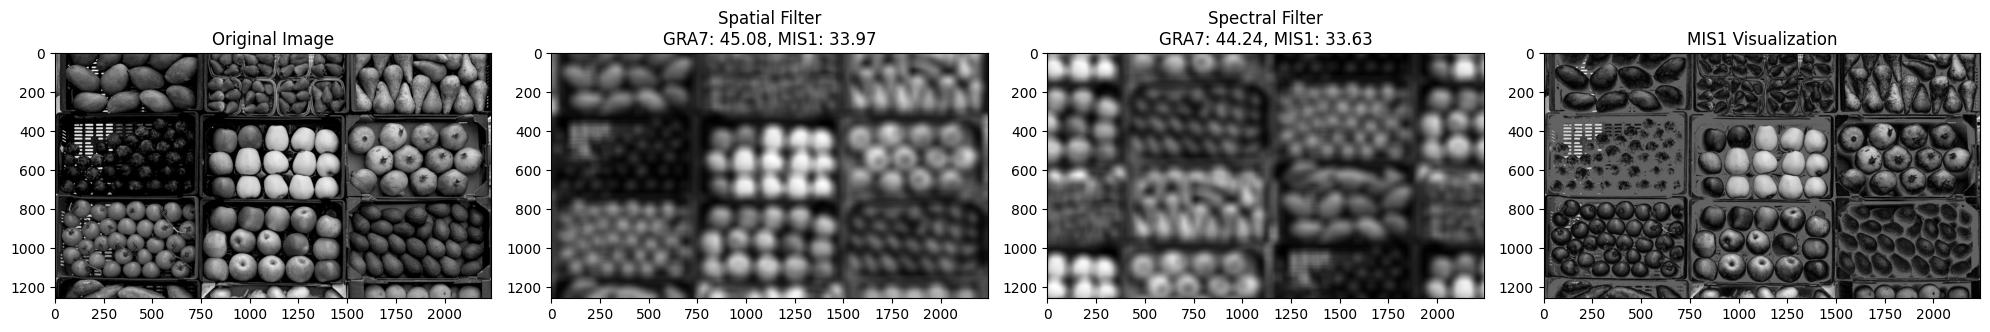

In [256]:
# Plotting
fig, axes = plt.subplots(1, 4, figsize=(20, 5))


axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")


axes[1].imshow(image_filtered_space, cmap='gray')
axes[1].set_title(f"Filtro Espacial\nGRA7: {fm_space:.2f}, MIS1: {acm_space:.2f}")

axes[2].imshow(image_filtered_spec, cmap='gray')
axes[2].set_title(f"Filtro Espectral\nGRA7: {fm_spec:.2f}, MIS1: {acm_spec:.2f}")

# ACM Visualization
acm_image = np.zeros_like(image, dtype=np.float32)
for k in range(256):
    acm_image += abs(k - np.mean(image)) * (image == k)
axes[3].imshow(acm_image, cmap='gray')
axes[3].set_title("MIS1")

plt.tight_layout()
plt.show()

En este ejercicio, FM (Focus Measure) se refiere a una medida general de la calidad de enfoque de una imagen, y específicamente, se utiliza la variante Tenengrad Variance (GRA7) como una forma de cuantificar la nitidez de la imagen. La Tenengrad Variance mide la varianza del gradiente de la imagen, asumiendo que las áreas más nítidas y enfocadas de una imagen tendrán gradientes más altos y, por lo tanto, una mayor varianza. Un valor más alto de FM indica una mayor nitidez y, por lo tanto, un mejor enfoque en la imagen.

En este contexto, FM no se refiere a una medida de frecuencia, sino más bien a una medida de enfoque que evalúa la nitidez de la imagen.

ACM (Absolute Central Moment) se refiere a una medida de contraste de la imagen. Específicamente, se utiliza la variante denominada MIS1 (Momento Central Absoluto) para evaluar el contraste.

La medida de ACM se basa en el concepto estadístico de momento central, que es una medida de la dispersión de los valores de intensidad de una imagen alrededor de su media. En el caso del momento central absoluto, se calcula la suma de las diferencias absolutas entre cada nivel de intensidad y la intensidad media de la imagen, ponderada por la frecuencia de cada nivel de intensidad (es decir, cuántas veces aparece cada nivel de intensidad en la imagen).

Un valor más alto de ACM indica un mayor contraste en la imagen, ya que significa que hay una mayor dispersión en los valores de intensidad alrededor de la media. Esto se traduce en diferencias más pronunciadas entre las áreas claras y oscuras de la imagen, lo que es un indicador de mayor contraste.